In [ ]:
# plots

In [40]:
library(dplyr)
library(lisi)
library(ggplot2)
library(mclust)
library(cluster)
library(RColorBrewer)
qiu_palette = c(brewer.pal(n = 7, 'Pastel1'), brewer.pal(n = 7, 'Set1'), brewer.pal(n = 7, 'Pastel2'))

In [3]:
# palettes
subs2 = c('Endocardial', 'Immature_Cardiomyocytes', 'Cardiomyocytes', 'Smooth_Muscle_Cells',  
          'Myeloid_Immune_Cells', 'Lymphoid_Immune_Cells', 'Pericytes_Stromal', 'Pericytes', 'Fibroblasts',
          'Endothelial_Arterial', 'Endothelial_Venous', 'Endothelial_Capillaries', 'Neuronal_Cells',
          'Immature_Endothelium', 'Immature_FB-like', 'Immature_Neuralcrest',
          'Epicardium_FB-like', 'Epicardium_Meso', 'Epicardium_Proliferating')

ks_palette = c('#29c5f6', '#f87cc3', '#d43035', '#e78b00',  
            '#cd7883', '#ff9aba', '#651f7e', '#643b9f', '#358957',
            '#dce775', '#574e3c', '#84b023', '#4900e6',
           '#fc6c85', '#a94064', '#c154c1',
           '#3a9bdc', '#5579c6', '#1260cc')
ks_palette <- ks_palette[order(subs2)]

In [60]:
# load data
currstage = 'stage13'
dfnew = read.delim(paste0(currstage, '_batch_corrected_embeddings.csv'), sep = ',')
dfnew[1:2,]

stage   sample  before_cls before_pc1
stage13_sample1_AAACCCAGTCGAGTTT-1 stage13 sample1 0          6.116759  
stage13_sample1_AAACCCAGTGGCCTCA-1 stage13 sample1 0          8.962798  
                                   before_pc2 before_umap1 before_umap2 cca_cls
stage13_sample1_AAACCCAGTCGAGTTT-1  0.5345144  0.6224141   6.961060     4      
stage13_sample1_AAACCCAGTGGCCTCA-1 -0.2052849 -1.9171467   6.729545     1      
                                   cca_pc1   cca_pc2   ⋯ mnn_tsne2
stage13_sample1_AAACCCAGTCGAGTTT-1 -12.89110 -1.261739 ⋯  6.819065
stage13_sample1_AAACCCAGTGGCCTCA-1 -14.44455 -1.137577 ⋯ -5.028191
                                   scanorama_cls scanorama_pc1 scanorama_pc2
stage13_sample1_AAACCCAGTCGAGTTT-1 0             0.2442419     0.07090212   
stage13_sample1_AAACCCAGTGGCCTCA-1 0             0.3317623     0.09258708   
                                   scanorama_umap1 scanorama_umap2
stage13_sample1_AAACCCAGTCGAGTTT-1 13.599419       7.010611       
stage13_sample1_AAACCCAGTGGCCTCA-1  9.295959       5.001098       
                                   Qiu_class      Qiu_celltype     
stage13_sample1_AAACCCAGTCGAGTTT-1 Cardiomyocytes First heart field
stage13_sample1_AAACCCAGTGGCCTCA-1 Cardiomyocytes First heart field
                                   KS_class       KS_celltype               
stage13_sample1_AAACCCAGTCGAGTTT-1 Cardiomyocytes Ventricular_Cardiomyocytes
stage13_sample1_AAACCCAGTGGCCTCA-1 Cardiomyocytes Ventricular_Cardiomyocytes

In [61]:
dfnew <- dfnew[!(dfnew$Qiu_class %in% c('B_cells', 'Mast_cells')),]

In [62]:
# LISI - batch mixing
library(lisi)
X = as.matrix(dfnew[,c('cca_umap1', 'cca_umap2')])
meta_data = data.frame(label1 = dfnew$sample)  # sample
res <- compute_lisi(X, meta_data, 'label1')
median(res[,1], na.rm = T)

X = as.matrix(dfnew[,c('rpca_umap1', 'rpca_umap2')])
meta_data = data.frame(label1 = dfnew$sample)  # sample
res <- compute_lisi(X, meta_data, 'label1')
median(res[,1], na.rm = T)

X = as.matrix(dfnew[,c('mnn_tsne1', 'mnn_tsne2')])
meta_data = data.frame(label1 = dfnew$sample)  # sample
res <- compute_lisi(X, meta_data, 'label1')
median(res[,1], na.rm = T)

X = as.matrix(dfnew[,c('scanorama_umap1', 'scanorama_umap2')])
meta_data = data.frame(label1 = dfnew$sample)  # sample
res <- compute_lisi(X, meta_data, 'label1')
median(res[,1], na.rm = T)

[1] 2.403676

[1] 2.262802

[1] 2.298357

[1] 2.289925

In [48]:
png(paste0('aa-cca-', currstage, '.png'), width = 4, height = 4, res = 300, units = 'in')
ggplot(dfnew, aes(x = cca_umap1, y = cca_umap2)) + 
geom_point(size = 0.1, aes(colour = factor(Qiu_class))) + 
theme_bw() + scale_color_manual(values = qiu_palette) + theme(legend.position = 'none')
# guides(colour = guide_legend(override.aes = list(size=2)))
dev.off()

png(paste0('aa-rpca-', currstage, '.png'), width = 4, height = 4, res = 300, units = 'in')
ggplot(dfnew, aes(x = rpca_umap1, y = rpca_umap2)) + 
geom_point(size = 0.1, aes(colour = factor(Qiu_class))) + 
theme_bw() + scale_color_manual(values = qiu_palette) + theme(legend.position = 'none')
# guides(colour = guide_legend(override.aes = list(size=2)))
dev.off()

png(paste0('aa-scanorama-', currstage, '.png'), width = 4, height = 4, res = 300, units = 'in')
ggplot(dfnew, aes(x = scanorama_umap1, y = scanorama_umap2)) + 
geom_point(size = 0.1, aes(colour = factor(Qiu_class))) + 
theme_bw() + scale_color_manual(values = qiu_palette) + theme(legend.position = 'none')
# guides(colour = guide_legend(override.aes = list(size=2)))
dev.off()

png(paste0('aa-mnn-', currstage, '.png'), width = 4, height = 4, res = 300, units = 'in')
ggplot(dfnew, aes(x = mnn_tsne1, y = mnn_tsne2)) + 
geom_point(size = 0.1, aes(colour = factor(Qiu_class))) + 
theme_bw() + scale_color_manual(values = qiu_palette) + theme(legend.position = 'none')
# guides(colour = guide_legend(override.aes = list(size=2)))
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

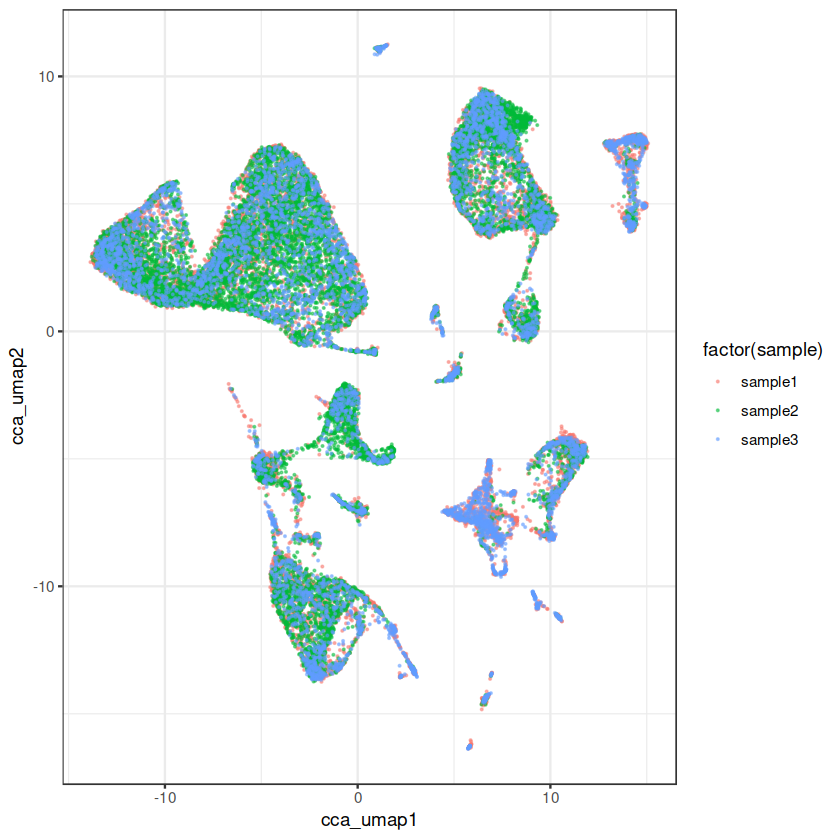

In [36]:
ggplot(dfnew, aes(x = cca_umap1, y = cca_umap2)) + 
geom_point(size = 0.1, alpha = 0.5, aes(colour = factor(sample))) + theme_bw()

In [44]:
table(dfnew$Qiu_class[dfnew$sample=='sample1'])


                   Cardiomyocytes                       CNS_neurons 
                             2626                                30 
             Definitive_erythroid                       Endothelium 
                              148                              1147 
                  Ependymal_cells                  Epithelial_cells 
                                1                                15 
                    Eye_and_other                       Hepatocytes 
                                1                                 1 
Intermediate_neuronal_progenitors                   Lung_and_airway 
                                4                                10 
                       Mast_cells                    Megakaryocytes 
                               11                               118 
                         Mesoderm                      Muscle_cells 
                             1629                                26 
            Neural_crest_PNS_glia